# ***Campaña de Marketing para importante banco portugues***

> Los depósitos a plazo son una fuente importante de ingresos para un banco. Un depósito a plazo es una inversión en efectivo mantenida en una institución financiera. Su dinero se invierte a una tasa de interés acordada durante un período de tiempo o plazo fijo. El banco tiene varios planes de divulgación para vender depósitos a plazo a sus clientes, como marketing por correo electrónico, publicidad, marketing telefónico y marketing digital.

> Las campañas de marketing telefónico siguen siendo una de las formas más efectivas de llegar a la gente. Sin embargo, requieren una gran inversión ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar de antemano a los clientes con más probabilidades de realizar una conversión para que puedan dirigirse específicamente a ellos a través de una llamada.

> Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo


---------------------------------------------------------------------------------

### Comenzaremos importando las librerías y leyendo el archivo con los datos

In [122]:
# Importamos las librerias a utilizar

# Operaciones Basicas
import numpy as np
import pandas as pd
import distutils.util

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Importamos la librería "hdbscan" para aplicar algoritmo de clasificación
from hdbscan import HDBSCAN

In [ ]:
# Lectura del dataset
df = pd.read_csv('data.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory Data Analysis (EDA)

 En este caso analizaremos los datos que tenemos y los modificaremos de ser necesario

In [ ]:
# Veamos los tipos de datos que tenemos
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Vemos que tenemos datos booleanos como object, esto es porque tienen como dato "yes" y "no", vamos a cambiar eso por "1" y "0" respectivamente.

In [ ]:
# Usamos la función "map()" para cambiar los valores de los datos.
df['default'] = df['default'].map({'yes':1, 'no':0}) # default representa si está deviendo muchas cuotas de un crédito.
df['housing'] = df['housing'].map({'yes':1, 'no':0}) # housing si tiene un préstamo de vivienda.
df['loan'] = df['loan'].map({'yes':1, 'no':0})       # loan si tiene un préstamo presonal.
df['y'] = df['y'].map({'yes':1, 'no':0})             # "y" si el cliente se suscribió un a un depósito a plazo.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# Veamos la cantidad de filas y columnas
df.shape

(45211, 17)

In [ ]:
# Veamos la información de estas columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


Podemos ver que no hay datos faltantes 

In [ ]:
# Veamos una por una las columnas que hay
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Descripción de las columnas


*   **job** : tipo de trabajo (variables categoricas: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

* **marital** : estado civil (variables categoricas: "married","divorced","single")

* **education** : (variables categoricas: "unknown","secondary","primary","tertiary")

* **default**: Tiene el crédito en default? (binary: "yes" = 1 ,"no" = 0))

* **balance**: Saldo promedio anual, in euros (numérico)

* **housing**: Tiene préstamo de vivienda? (binary: "yes" = 1 ,"no" = 0))

* **contact**: Tipo de contacto (variables categoricas: "unknown","telephone", "cellular")

* **day**: Último día de contacto del mes (numérico)

* **month**: Último mes de contacto en el año (variables categoricas: "jan", "feb", "mar", …, "nov", "dec")

* **duration**: Duración del último contacto, en segundos (numérico)

* **campaign**: número de contactos realizados durante esta campaña y para este cliente (numérico, incluido el último contacto)

* **pdays**: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)

* **previous**: número de contactos realizados antes de esta campaña y para este cliente (numérico)

* **poutcome**: resultado de la campaña de marketing anterior (categorical: "unknown","other","failure","success")

## Variable buscada (target)
* **y **- ¿El cliente ha suscrito un depósito a plazo? (binary: "yes" = 1 ,"no" = 0) 


# Estadísticas descriptivas

In [ ]:
# Realizamos un análisis rápido de los datos numéricos de nuestro dataset 
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [ ]:
# Redondeamos estos datos
df.describe().round()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0
mean,41.0,0.0,1362.0,1.0,0.0,16.0,258.0,3.0,40.0,1.0,0.0
std,11.0,0.0,3045.0,0.0,0.0,8.0,258.0,3.0,100.0,2.0,0.0
min,18.0,0.0,-8019.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0
25%,33.0,0.0,72.0,0.0,0.0,8.0,103.0,1.0,-1.0,0.0,0.0
50%,39.0,0.0,448.0,1.0,0.0,16.0,180.0,2.0,-1.0,0.0,0.0
75%,48.0,0.0,1428.0,1.0,0.0,21.0,319.0,3.0,-1.0,0.0,0.0
max,95.0,1.0,102127.0,1.0,1.0,31.0,4918.0,63.0,871.0,275.0,1.0


## Ahora usemos el metodo de pearson para ver la correlación entre todas las variables del dataset

In [ ]:
correlation = df.corr(method="pearson")
correlation.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185


 Como la data puede no ser tan intuitiva, veamos esto en un gráfico de calor.
 
 Mientras más oscuro sea el dato más correlación tiene.

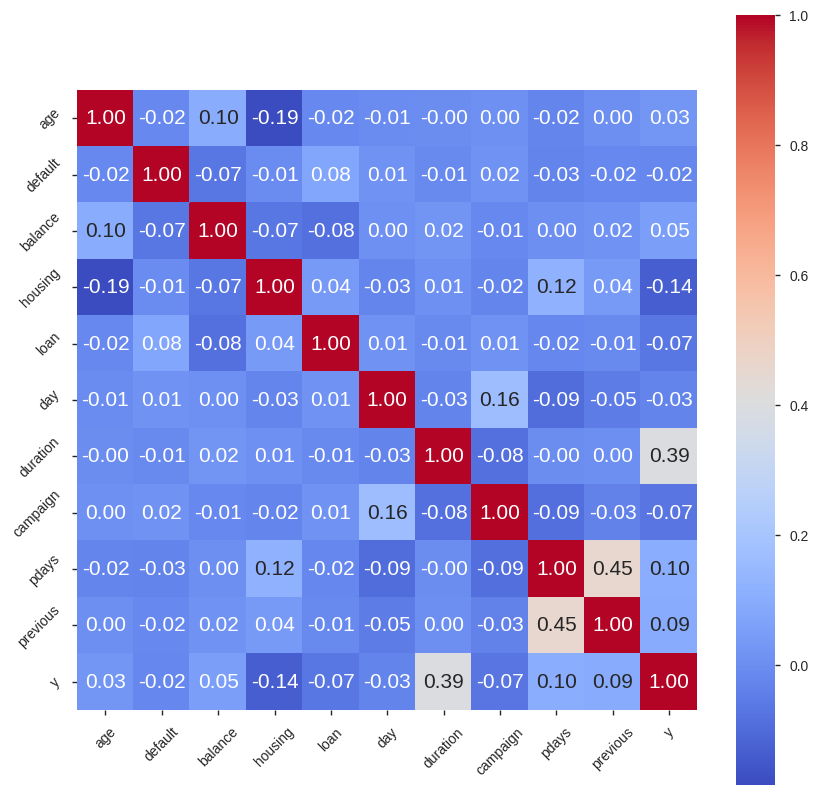

In [148]:
# Establezco el tamaño del gráfico
plt.figure(figsize=(10,10))

# Defino el gráfico a usar, en este caso heatmap (mapa de calor) 
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45)
plt.yticks(rotation = 45);


Observando este gráfico, podemos notar que hay una alta correlación entre "pdays" (que es el número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior) y "previous" (que es el número de contactos realizados antes de esta campaña y para este cliente)

# Comenzamos a graficar! 

 

## Primero veamos como se encuentra el balance de las personas en nuestro dataframe

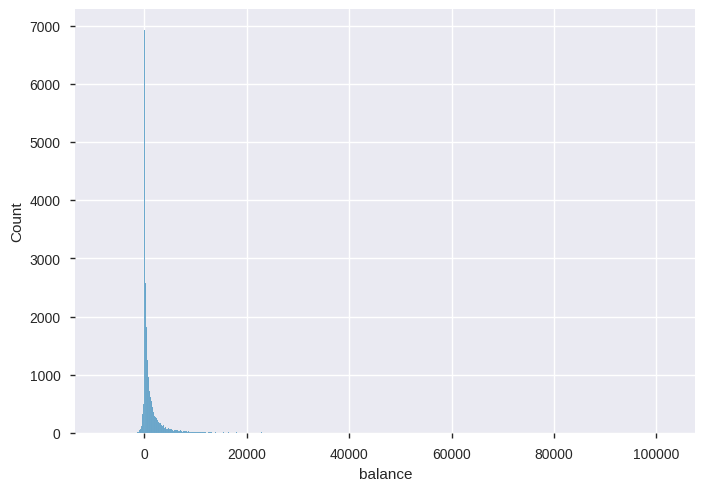

In [124]:
# Declaro el tipo de gráfico y la columna a graficar
sns.histplot(df['balance'])

Como vemos, los datos de "balance"(saldo promedio anual, en euros) están desbalanceados. La mayoría ronda entre los €0 y €10.000, con una minoría que están en default, es decir menor a €0, y otra minoría que tiene un saldo promedio anual mayor a €20.000 

### Ahora veamos cuantos tienen préstamos personales

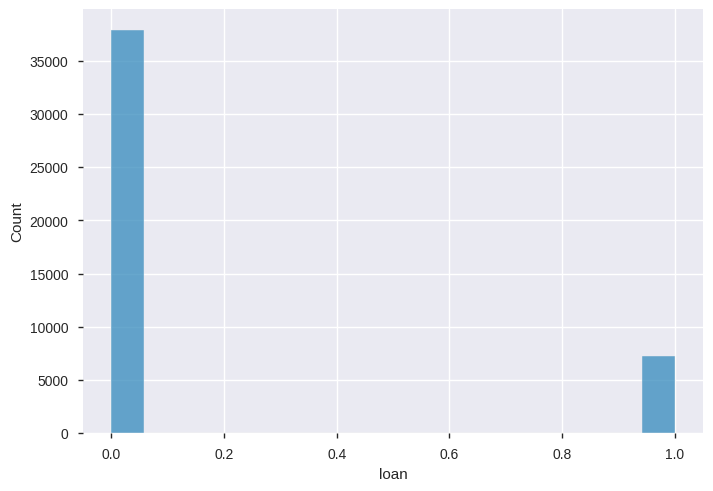

In [127]:
sns.histplot(df['loan'])

 En este caso, vemos que pocas personas poseen un crédito personal ("loan").

 ### Ahora analicemos cuantas personas no pagan sus préstamos

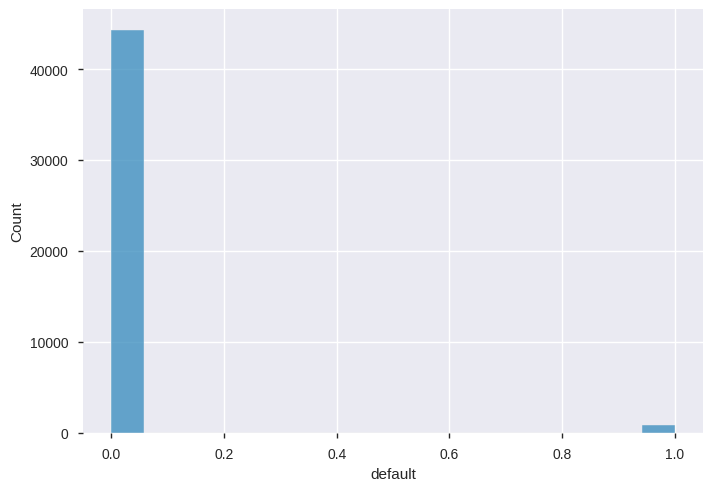

In [149]:
sns.histplot(df['default'])

En este último caso podemos ver que muy pocas personas en la base de datos se encuentran en "default" o que deben dinero.

## Ahora usamos un gráfico de barras para comparar los balances según los trabajos

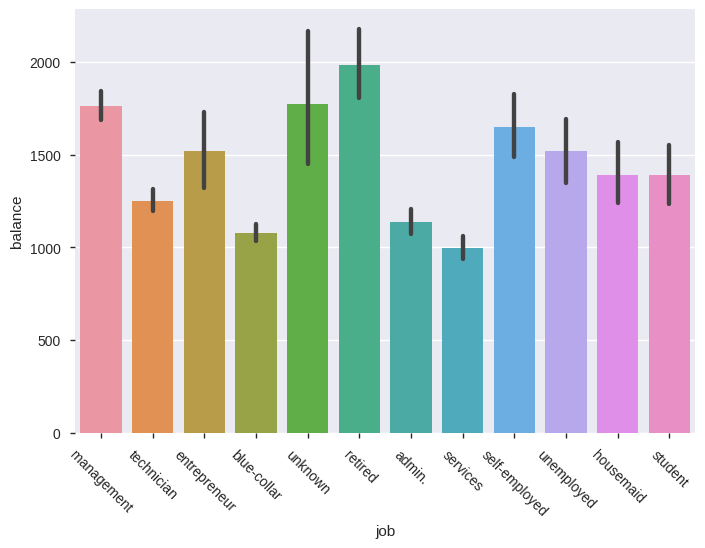

In [ ]:
# Declaro el gráfico de barras
barplot = sns.barplot(x= df['job'], y=df['balance'])

# Modifico los datos del eje x para que estén con inclinación de -45°
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=-45)
plt.show()

En este caso analizamos los balances según el trabajo, donde vemos que los que mayor balance presentan son los retirados.

## Ahora comparemos según el estado civil quienes piden prestamos de vivienda

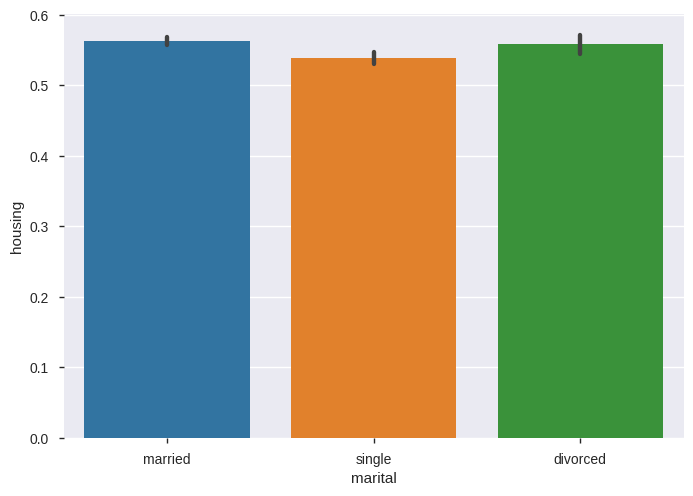

In [142]:
# Declaro el gráfico de barras
sns.barplot(x= df['marital'], y=df['housing'])
plt.show()

Por lo que se puede ver no hay una gran diferencia entre quienes piden prestamos de vivienda, por lo tanto no sería del todo útil orientar el marketing por este lado, pero hay que tenerlo en cuenta.

## En este caso analizaremos quienes piden préstamos personales según el trabajo que posean

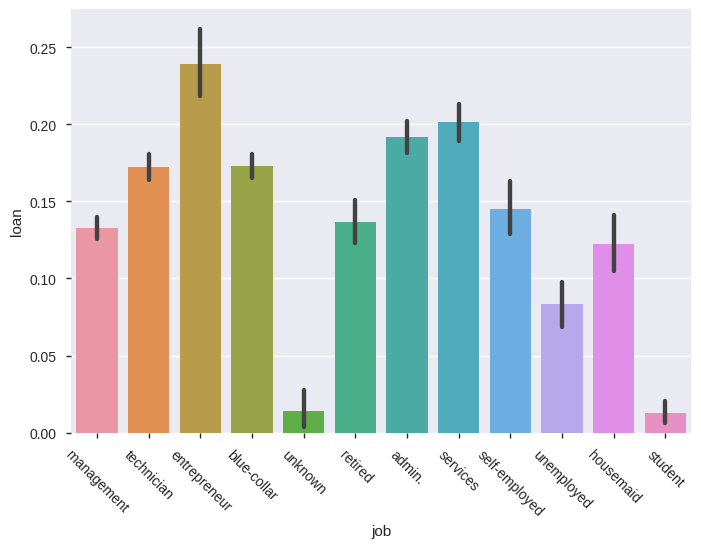

In [138]:
# Declaro el gráfico de barras
barplot = sns.barplot(x= df['job'], y=df['loan'])
# Modifico los datos del eje x para que estén con inclinación de -45°
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=-45)
plt.show()

Podemos notar que los que más préstamos personales piden son de la categoría "entrepreneur" (empresario) y los que menos préstamos personales piden son los estudiantes.

## Ahora analicemos múltiples variables a la vez

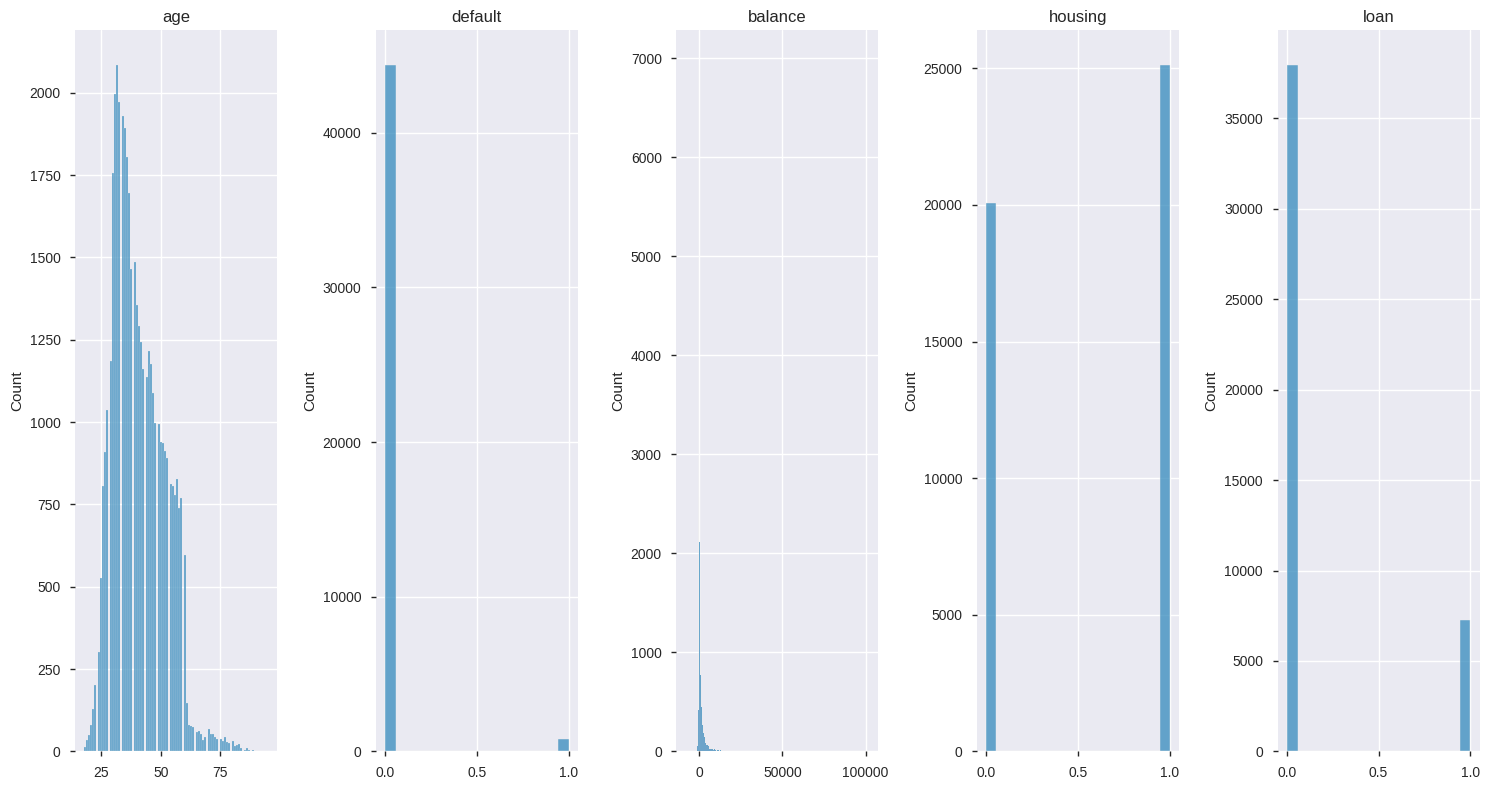

In [ ]:
# Declaro las columnas a usar en la variable "variables"
variables = ['age',	'default',	'balance',	'housing',	'loan']

# Defino el número de columnas a usar
columns = 5

# Declaro el gráfico y los divido por columnas y establezco el tamaño de cada gráfico
fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8), squeeze=False)

# Uso un for para cargar los datos de las variables en los distintos gráficos
for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns

    # Acá defino el tipo de gráfico a usar
    sns.histplot(df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

 En este caso podemos observar que la mayor parte de nuestro dataset la componen personas de entre 30 y 40 años, que llevan un balance en torno a los €0 y €10.000 y que pocas personas están en default con sus préstamos. Además podemos notar que se inclinan más a solicitar préstamos de viviendas que personales (housing y loan).

## Veamos ahora los valores extremos que tenemos en "age" y en "balance"

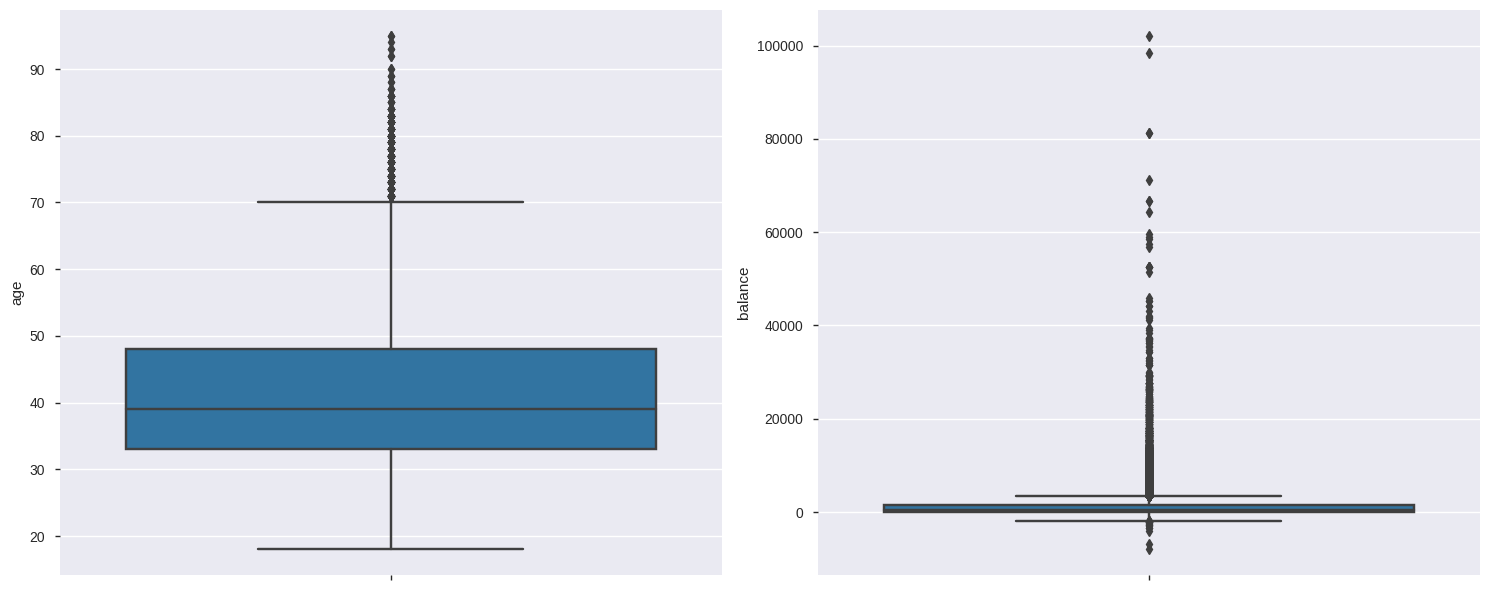

In [150]:
# Defino las columnas a graficar 
variables = ['age',	'balance']

# Indico que voy a usar varios gráficos y le paso las columnas a graficar
fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

# Creo un for para cargar los datos de las variables
for ax, variable in zip(axes, variables):
  # Defino el tipo de gráfico a utilizar
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

 Podemos observar con más presición que la mayor parte del dataset la componen personas entre 35 y 50 años, y que sus balances rondan entre los €0 y €5000, aunque hay personas de entre 20 y 90 años y balances de hasta €100.000. 

Los balances que están por debajo de €0 son las personas que están en deuda con el banco y no las están pagando (default).

------------------------------------------------------------------------------------------------------------------------------

## Ahora veamos la correlación entre la edad y el balance

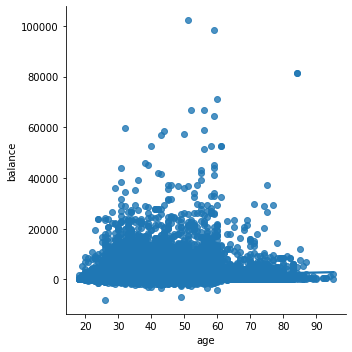

In [ ]:
# Defino el tipo de gráfico a usar y le paso la data a graficar
sns.lmplot(x='age', y='balance', data=df, fit_reg=True) 

Podemos observar que este tipo de gráfico no nos es tan útil, ya que no podemos diferenciar grupos con claridad para orientar el marketing, pero más adelante, con técnicas de agrupación podremos solucionar este problema.

----------------------------------------------------------------------------------------------------------------------------------------

# Comenzemos a aplicar algoritmos

## Comenzamos con algoritmos de ***clasificación***
### Vamos a utilizar ***Regresión Logística***

In [ ]:
# Importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos en X e y
X = df.drop({'y','job','education', 'marital', 'contact', 'month', 'poutcome'}, axis=1)
y = df['y']

In [ ]:
# Separamos en train y test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size=0.30, random_state=11)

In [ ]:
# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression(max_iter = 10000)

In [ ]:
# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Usamos el modelo entrenado para obtener las predicciones con datos nuevos

prediccion = regresion_logistica.predict(X_test)
print(prediccion)

[1 0 0 ... 1 0 0]


In [ ]:
# obtenemos las probabilidades de la predicción ya que los datos mostrados arriba
# no son de gran utilidad
probabilidades_prediccion = regresion_logistica.predict_proba(X_test)
print(probabilidades_prediccion)

[[0.1331039  0.8668961 ]
 [0.81697966 0.18302034]
 [0.75180506 0.24819494]
 ...
 [0.4098296  0.5901704 ]
 [0.98059073 0.01940927]
 [0.85949435 0.14050565]]


Los datos mostrados son las probabilidades de que los usuarios se suscriban nuevamente a un depósito durante un periodo de tiempo o a plazo fijo en el banco. 

Esta información nos puede indicar a que personas orientar la campaña de marketing, pero verlo de esta forma es medio incomodo, a continuación, con algoritmos de agrupación podremos diferenciar los grupos más visualmente.

## Ahora vamos a aplicar ***Algoritmos de Agrupación***
### Vamos a utilizar ***HDBSCAN***

In [ ]:
# Instanciamos el algoritmo
hdbscan = HDBSCAN(min_cluster_size=20,
                 min_samples=10)
                 
# Entrenamos y predecimos usando de base la variable X que declaramos para aplicar el 
# Algoritmo de clasificación
preds = hdbscan.fit_predict(X)

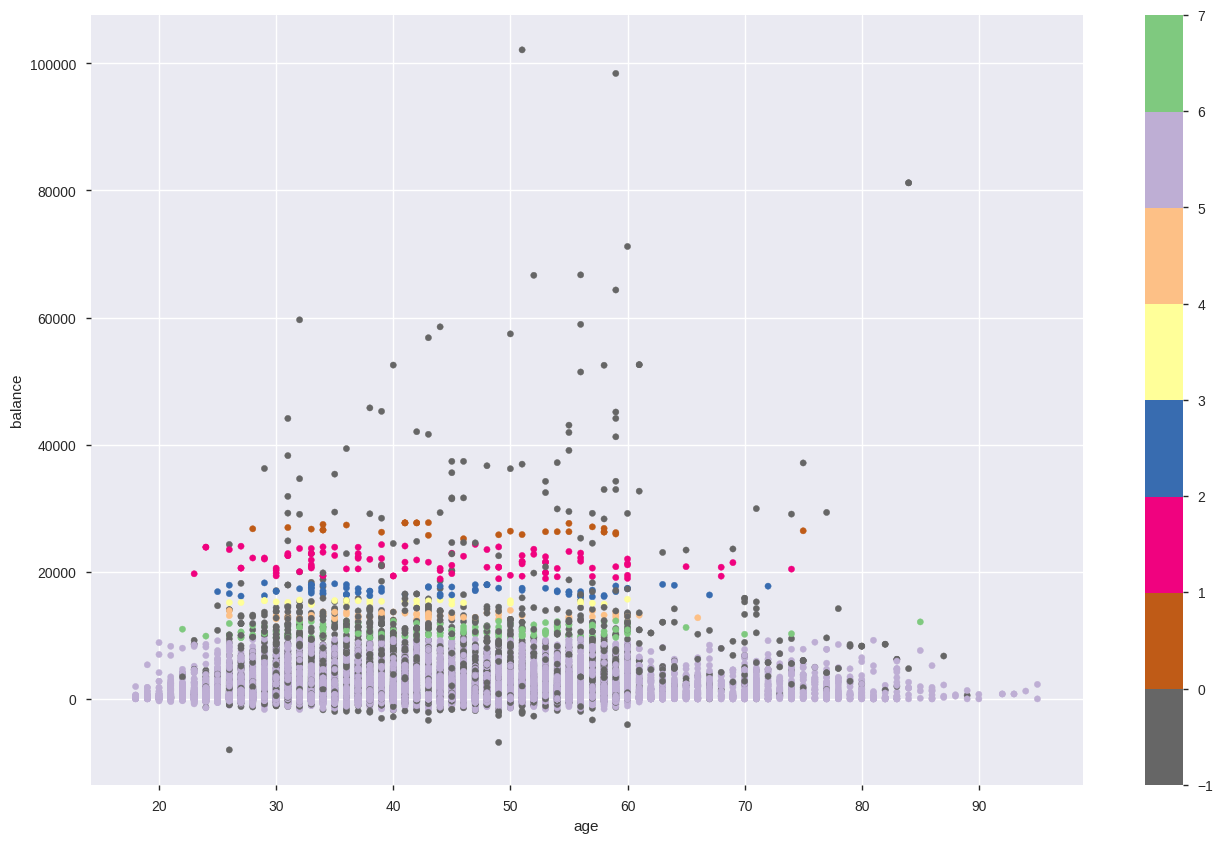

In [ ]:
# Graficamos
X.plot(kind='scatter', x='age', y='balance', c=preds, cmap='Accent_r', figsize=(16,10))

 Como podemos ver en el anterior gráfico, se distinguen hasta 8 grupos, donde los puntos grises que es el "ruido" del dataset. 

# **Conclusión**
## La campaña de marketing que realizará el banco el siguiente periodo deberá enfocarse prioritariamente en el grupo fucsia y azul, que rondan edades de entre los 23/25 y los 60/70 años y tienen un saldo promedio anual (balance) de entre €18.000 a €23.000

## También se podría implementar la campaña de marketing para el grupo violeta para que aumenten el saldo promedio anual, ya que son una gran mayoría pero poseen un balance bastante bajo